In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

C:\Users\teste\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
url = "https://books.toscrape.com/"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
response.text[1:100]

'!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![end'

In [6]:
response.content[1:100]

b'!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![end'

In [7]:
pagecontent = response.text

In [8]:
soup = BeautifulSoup(pagecontent)

In [9]:
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static

In [10]:
pname = soup.find("div",attrs = {"class":"col-sm-8 h1"})

In [11]:
pname

<div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
</div>

In [12]:
productname = []
for x in soup.find_all("article", attrs={"class": "product_pod"}):
    a_tag = x.find("h3").find("a")
    productname.append(a_tag["title"] if a_tag else np.nan)
for name in productname:
    print(name)

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [13]:
ratings = []
for book in soup.find_all("article", class_="product_pod"):
    rating_tag = book.find("p", class_="star-rating")
    if rating_tag:
        rating = rating_tag["class"][1]
        ratings.append(rating)
for r in ratings:
    print(r)

Three
One
One
Four
Five
One
Four
Three
Four
One
Two
Four
Five
Five
Five
Three
One
One
Two
Two


In [14]:
price = []
for x in soup.find_all("article", class_="product_pod"):
    price_tag = x.find("p", class_="price_color")
    price.append(price_tag.text.strip() if price_tag else np.nan)
for p in price:
    print(p)

Â£51.77
Â£53.74
Â£50.10
Â£47.82
Â£54.23
Â£22.65
Â£33.34
Â£17.93
Â£22.60
Â£52.15
Â£13.99
Â£20.66
Â£17.46
Â£52.29
Â£35.02
Â£57.25
Â£23.88
Â£37.59
Â£51.33
Â£45.17


In [15]:
for i in range(1,99):
    url = f"https://books.toscrape.com/={i}"
    print(url)

https://books.toscrape.com/=1
https://books.toscrape.com/=2
https://books.toscrape.com/=3
https://books.toscrape.com/=4
https://books.toscrape.com/=5
https://books.toscrape.com/=6
https://books.toscrape.com/=7
https://books.toscrape.com/=8
https://books.toscrape.com/=9
https://books.toscrape.com/=10
https://books.toscrape.com/=11
https://books.toscrape.com/=12
https://books.toscrape.com/=13
https://books.toscrape.com/=14
https://books.toscrape.com/=15
https://books.toscrape.com/=16
https://books.toscrape.com/=17
https://books.toscrape.com/=18
https://books.toscrape.com/=19
https://books.toscrape.com/=20
https://books.toscrape.com/=21
https://books.toscrape.com/=22
https://books.toscrape.com/=23
https://books.toscrape.com/=24
https://books.toscrape.com/=25
https://books.toscrape.com/=26
https://books.toscrape.com/=27
https://books.toscrape.com/=28
https://books.toscrape.com/=29
https://books.toscrape.com/=30
https://books.toscrape.com/=31
https://books.toscrape.com/=32
https://books.tos

In [16]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import time

# Lists to store data
productname = []
price = []
rating = []
availability = []
pagenum = []
product_link = []
image_link = []
category = []
description = []
upc = []

# Timer to track total scraping time
total_time = time.time()

# Loop through all 50 pages
for i in range(1, 51):
    start_time = time.time()
    URL = f"https://books.toscrape.com/catalogue/page-{i}.html"
    page = requests.get(URL)

    if page.status_code != 200:
        print(f"❌ Page {i} not found, stopping.")
        break

    soup = BeautifulSoup(page.text, "html.parser")

    # Loop through each book on the page
    for book in soup.find_all('article', class_='product_pod'):
        # Basic info
        pname = book.h3.a['title'] if book.h3.a else np.nan
        cost = book.find('p', class_='price_color')
        rat = book.find('p', class_='star-rating')
        stock = book.find('p', class_='instock availability')
        link = "https://books.toscrape.com/catalogue/" + book.h3.a['href']
        img = "https://books.toscrape.com/" + book.find("img")['src'].replace("../", "")

        productname.append(pname)
        price.append(cost.text.strip() if cost else np.nan)
        rating.append(rat['class'][1] if rat and len(rat['class']) > 1 else np.nan)
        availability.append(stock.text.strip() if stock else np.nan)
        pagenum.append(i)
        product_link.append(link)
        image_link.append(img)

        # Fetch extra info from product page
        prod_page = requests.get(link)
        psoup = BeautifulSoup(prod_page.text, "html.parser")

        # Category
        cat = psoup.find("ul", class_="breadcrumb").find_all("a")[-1].text.strip() if psoup.find("ul", class_="breadcrumb") else np.nan
        category.append(cat)

        # Description
        desc_tag = psoup.find("div", id="product_description")
        desc = desc_tag.find_next("p").text.strip() if desc_tag else "No description"
        description.append(desc)

        # UPC from table
        table = psoup.find("table", class_="table table-striped")
        if table:
            upc_value = table.find("td").text.strip()
            upc.append(upc_value)
        else:
            upc.append(np.nan)

    print(f"✅ Page {i} completed in {time.time() - start_time:.2f} seconds")

print("\n🎯 Total Time Completed in seconds:", round(time.time() - total_time, 2))
print(f"📚 Total Books Scraped: {len(productname)}")

✅ Page 1 completed in 20.60 seconds
✅ Page 2 completed in 21.64 seconds
✅ Page 3 completed in 19.83 seconds
✅ Page 4 completed in 20.74 seconds
✅ Page 5 completed in 20.29 seconds
✅ Page 6 completed in 19.68 seconds
✅ Page 7 completed in 19.94 seconds
✅ Page 8 completed in 21.22 seconds
✅ Page 9 completed in 18.88 seconds
✅ Page 10 completed in 20.70 seconds
✅ Page 11 completed in 21.53 seconds
✅ Page 12 completed in 21.09 seconds
✅ Page 13 completed in 20.20 seconds
✅ Page 14 completed in 22.66 seconds
✅ Page 15 completed in 25.48 seconds
✅ Page 16 completed in 20.76 seconds
✅ Page 17 completed in 21.95 seconds
✅ Page 18 completed in 20.53 seconds
✅ Page 19 completed in 19.00 seconds
✅ Page 20 completed in 20.98 seconds
✅ Page 21 completed in 21.10 seconds
✅ Page 22 completed in 21.59 seconds
✅ Page 23 completed in 20.14 seconds
✅ Page 24 completed in 21.01 seconds
✅ Page 25 completed in 20.77 seconds
✅ Page 26 completed in 19.04 seconds
✅ Page 27 completed in 19.97 seconds
✅ Page 28 

In [17]:
books_df = pd.DataFrame({
    "Product Name": productname,
    "Price": price,
    "Rating": rating,
    "Availability": availability,
    "Page Number": pagenum,
    "Product Link": product_link,
    "Image Link": image_link,
    "Category": category,
    "Description": description,
    "UPC": upc
})

In [18]:
books_df

,Product Name,Price,Rating,Availability,Page Number,Product Link,Image Link,Category,Description,UPC
0,A Light in the Attic,Â£51.77,Three,In stock,1,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/media/cache/2c/da/2...,Poetry,It's hard to imagine a world without A Light i...,a897fe39b1053632
1,Tipping the Velvet,Â£53.74,One,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,https://books.toscrape.com/media/cache/26/0c/2...,Historical Fiction,"""Erotic and absorbing...Written with starling ...",90fa61229261140a
2,Soumission,Â£50.10,One,In stock,1,https://books.toscrape.com/catalogue/soumissio...,https://books.toscrape.com/media/cache/3e/ef/3...,Fiction,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760
3,Sharp Objects,Â£47.82,Four,In stock,1,https://books.toscrape.com/catalogue/sharp-obj...,https://books.toscrape.com/media/cache/32/51/3...,Mystery,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock,1,https://books.toscrape.com/catalogue/sapiens-a...,https://books.toscrape.com/media/cache/be/a5/b...,History,From a renowned historian comes a groundbreaki...,4165285e1663650f
...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,One,In stock,50,https://books.toscrape.com/catalogue/alice-in-...,https://books.toscrape.com/media/cache/96/ee/9...,Classics,No description,cd2a2a70dd5d176d
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,Four,In stock,50,https://books.toscrape.com/catalogue/ajin-demi...,https://books.toscrape.com/media/cache/09/7c/0...,Sequential Art,High school student Kei Nagai is struck dead i...,bfd5e1701c862ac3
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,Five,In stock,50,https://books.toscrape.com/catalogue/a-spys-de...,https://books.toscrape.com/media/cache/1b/5f/1...,Historical Fiction,"In Englandâs Regency era, manners and elegan...",19fec36a1dfb4c16
998,1st to Die (Women's Murder Club #1),Â£53.98,One,In stock,50,https://books.toscrape.com/catalogue/1st-to-di...,https://books.toscrape.com/media/cache/2b/41/2...,Mystery,"James Patterson, bestselling author of the Ale...",f684a82adc49f011


In [19]:
books_df.to_csv("books_full_data.csv", index=False, encoding='utf-8-sig')

In [20]:
df = pd.read_csv("books_full_data.csv")

In [21]:
df.head(1)

,Product Name,Price,Rating,Availability,Page Number,Product Link,Image Link,Category,Description,UPC
0,A Light in the Attic,Â£51.77,Three,In stock,1,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/media/cache/2c/da/2...,Poetry,It's hard to imagine a world without A Light i...,a897fe39b1053632


In [22]:
df.shape

(1000, 10)

In [23]:
df.dtypes

Product Name    object
Price           object
Rating          object
Availability    object
Page Number      int64
Product Link    object
Image Link      object
Category        object
Description     object
UPC             object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  1000 non-null   object
 1   Price         1000 non-null   object
 2   Rating        1000 non-null   object
 3   Availability  1000 non-null   object
 4   Page Number   1000 non-null   int64 
 5   Product Link  1000 non-null   object
 6   Image Link    1000 non-null   object
 7   Category      1000 non-null   object
 8   Description   1000 non-null   object
 9   UPC           1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.3+ KB


In [25]:
df.isnull().sum()

Product Name    0
Price           0
Rating          0
Availability    0
Page Number     0
Product Link    0
Image Link      0
Category        0
Description     0
UPC             0
dtype: int64

In [69]:
df.duplicated().sum()

0

In [26]:
df["Price"]

0      Â£51.77
1      Â£53.74
2      Â£50.10
3      Â£47.82
4      Â£54.23
        ...   
995    Â£55.53
996    Â£57.06
997    Â£16.97
998    Â£53.98
999    Â£26.08
Name: Price, Length: 1000, dtype: object

In [27]:
df["Currency"] = df["Price"].apply(lambda x: re.search(r"[^\d\.]", x).group() if pd.notnull(x) else "")

In [28]:
df["Currency"]

0      Â
1      Â
2      Â
3      Â
4      Â
      ..
995    Â
996    Â
997    Â
998    Â
999    Â
Name: Currency, Length: 1000, dtype: object

In [29]:
df["Clean_Price"] = df["Price"].apply(lambda x: float(re.search(r"(\d+\.\d+)", x.replace("Â£", "").strip()).group()) if pd.notnull(x) else np.nan)

In [30]:
df["Rating"]

0      Three
1        One
2        One
3       Four
4       Five
       ...  
995      One
996     Four
997     Five
998      One
999     Five
Name: Rating, Length: 1000, dtype: object

In [31]:
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
df["Numeric_Rating"] = df["Rating"].map(rating_map)

In [32]:
df["Numeric_Rating"]

0      3
1      1
2      1
3      4
4      5
      ..
995    1
996    4
997    5
998    1
999    5
Name: Numeric_Rating, Length: 1000, dtype: int64

In [33]:
df["Category"]

0                  Poetry
1      Historical Fiction
2                 Fiction
3                 Mystery
4                 History
              ...        
995              Classics
996        Sequential Art
997    Historical Fiction
998               Mystery
999                Travel
Name: Category, Length: 1000, dtype: object

In [34]:
def categorize_book(cat):
    fiction_categories = ["Fiction", "Historical Fiction", "Mystery", "Poetry", "Classics", "Romance", "Thriller", "Fantasy"]
    non_fiction_categories = ["History", "Science", "Biography", "Travel", "Business", "Religion"]
    comics_categories = ["Sequential Art", "Graphic Novels", "Comics"]
    children_categories = ["Children", "Young Adult"]
    
    if cat in fiction_categories:
        return "Fiction"
    elif cat in non_fiction_categories:
        return "Non-Fiction"
    elif cat in comics_categories:
        return "Comics/Graphic"
    elif cat in children_categories:
        return "Children/YA"
    else:
        return "Other"
df["Category_Type"] = df["Category"].apply(categorize_book)

In [35]:
df["Category_Type"]

0             Fiction
1             Fiction
2             Fiction
3             Fiction
4         Non-Fiction
            ...      
995           Fiction
996    Comics/Graphic
997           Fiction
998           Fiction
999       Non-Fiction
Name: Category_Type, Length: 1000, dtype: object

In [36]:
df["Description"]

0      It's hard to imagine a world without A Light i...
1      "Erotic and absorbing...Written with starling ...
2      Dans une France assez proche de la nÃ´tre, un ...
3      WICKED above her hipbone, GIRL across her hear...
4      From a renowned historian comes a groundbreaki...
                             ...                        
995                                       No description
996    High school student Kei Nagai is struck dead i...
997    In Englandâs Regency era, manners and elegan...
998    James Patterson, bestselling author of the Ale...
999    Around the World, continent by continent, here...
Name: Description, Length: 1000, dtype: object

In [37]:
def description_type(desc):
    if pd.isna(desc) or desc.strip() == "No description":
        return "No description"
    length = len(desc)
    if length < 50:
        return "Short"
    elif length <= 150:
        return "Medium"
    else:
        return "Long"
df["Description_Type"] = df["Description"].apply(description_type)

In [38]:
df["Description_Type"]

0                Long
1                Long
2                Long
3                Long
4                Long
            ...      
995    No description
996              Long
997              Long
998              Long
999              Long
Name: Description_Type, Length: 1000, dtype: object

In [39]:
df["Description_Word_Count"] = df["Description"].apply(lambda x: len(re.findall(r"\w+", x)) if pd.notnull(x) else 0)

In [40]:
df["Description_Word_Count"]

0      177
1      171
2      189
3      286
4      323
      ... 
995      2
996    167
997    232
998    526
999    284
Name: Description_Word_Count, Length: 1000, dtype: int64

In [41]:
df.shape

(1000, 16)

In [42]:
df.dtypes

Product Name               object
Price                      object
Rating                     object
Availability               object
Page Number                 int64
Product Link               object
Image Link                 object
Category                   object
Description                object
UPC                        object
Currency                   object
Clean_Price               float64
Numeric_Rating              int64
Category_Type              object
Description_Type           object
Description_Word_Count      int64
dtype: object

In [43]:
df["UPC"]

0      a897fe39b1053632
1      90fa61229261140a
2      6957f44c3847a760
3      e00eb4fd7b871a48
4      4165285e1663650f
             ...       
995    cd2a2a70dd5d176d
996    bfd5e1701c862ac3
997    19fec36a1dfb4c16
998    f684a82adc49f011
999    228ba5e7577e1d49
Name: UPC, Length: 1000, dtype: object

In [44]:
df["UPC_Letters"] = df["UPC"].apply(lambda x: "".join(re.findall(r"[A-Za-z]+", x)) if pd.notnull(x) else "")

In [45]:
df["UPC_Letters"]

0          afeb
1           faa
2           fca
3       eebfdba
4            ef
         ...   
995    cdaadddd
996     bfdecac
997    fecadfbc
998      faadcf
999       baeed
Name: UPC_Letters, Length: 1000, dtype: object

In [46]:
df["UPC_Numbers"] = df["UPC"].apply(lambda x: "".join(re.findall(r"\d+", x)) if pd.notnull(x) else "")

In [47]:
df["UPC_Numbers"]

0        897391053632
1       9061229261140
2       6957443847760
3           004787148
4      41652851663650
            ...      
995          22705176
996         517018623
997          19361416
998        6848249011
999       22857577149
Name: UPC_Numbers, Length: 1000, dtype: object

In [48]:
df.shape

(1000, 18)

In [49]:
df.dtypes

Product Name               object
Price                      object
Rating                     object
Availability               object
Page Number                 int64
Product Link               object
Image Link                 object
Category                   object
Description                object
UPC                        object
Currency                   object
Clean_Price               float64
Numeric_Rating              int64
Category_Type              object
Description_Type           object
Description_Word_Count      int64
UPC_Letters                object
UPC_Numbers                object
dtype: object

In [50]:
df["UPC_Numbers_Num"] = pd.to_numeric(df["UPC_Numbers"], errors="coerce")

In [51]:
df.dtypes

Product Name               object
Price                      object
Rating                     object
Availability               object
Page Number                 int64
Product Link               object
Image Link                 object
Category                   object
Description                object
UPC                        object
Currency                   object
Clean_Price               float64
Numeric_Rating              int64
Category_Type              object
Description_Type           object
Description_Word_Count      int64
UPC_Letters                object
UPC_Numbers                object
UPC_Numbers_Num             int64
dtype: object

In [52]:
df.head(1)

,Product Name,Price,Rating,Availability,Page Number,Product Link,Image Link,Category,Description,UPC,Currency,Clean_Price,Numeric_Rating,Category_Type,Description_Type,Description_Word_Count,UPC_Letters,UPC_Numbers,UPC_Numbers_Num
0,A Light in the Attic,Â£51.77,Three,In stock,1,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/media/cache/2c/da/2...,Poetry,It's hard to imagine a world without A Light i...,a897fe39b1053632,Â,51.77,3,Fiction,Long,177,afeb,897391053632,897391053632


In [53]:
df.isnull().sum()

Product Name              0
Price                     0
Rating                    0
Availability              0
Page Number               0
Product Link              0
Image Link                0
Category                  0
Description               0
UPC                       0
Currency                  0
Clean_Price               0
Numeric_Rating            0
Category_Type             0
Description_Type          0
Description_Word_Count    0
UPC_Letters               0
UPC_Numbers               0
UPC_Numbers_Num           0
dtype: int64

In [54]:
df.to_csv("cleaned_books_csv")

In [55]:
df = pd.read_csv("cleaned_books_csv")

In [56]:
df.columns

Index(['Unnamed: 0', 'Product Name', 'Price', 'Rating', 'Availability',
       'Page Number', 'Product Link', 'Image Link', 'Category', 'Description',
       'UPC', 'Currency', 'Clean_Price', 'Numeric_Rating', 'Category_Type',
       'Description_Type', 'Description_Word_Count', 'UPC_Letters',
       'UPC_Numbers', 'UPC_Numbers_Num'],
      dtype='object')

## Univariate Analysis (Individual Columns)

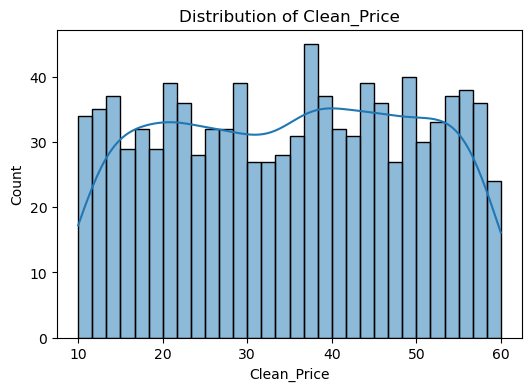

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(df['Clean_Price'], bins=30, kde=True)
plt.title("Distribution of Clean_Price")
plt.show()

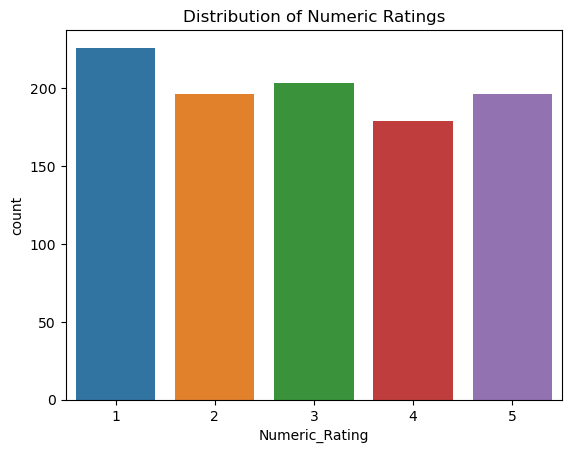

In [58]:
sns.countplot(x='Numeric_Rating', data=df)
plt.title("Distribution of Numeric Ratings")
plt.show()

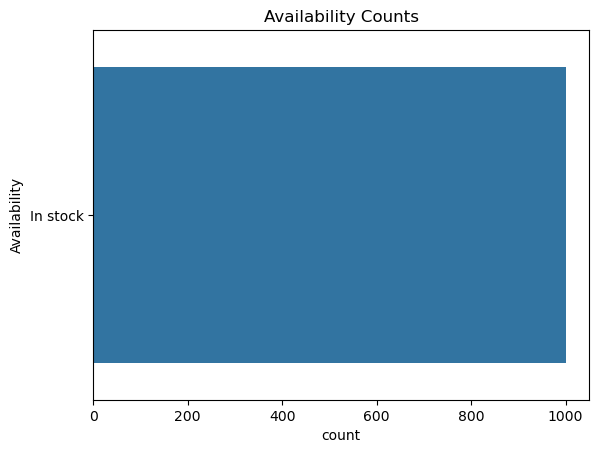

In [59]:
sns.countplot(y='Availability', data=df)
plt.title("Availability Counts")
plt.show()

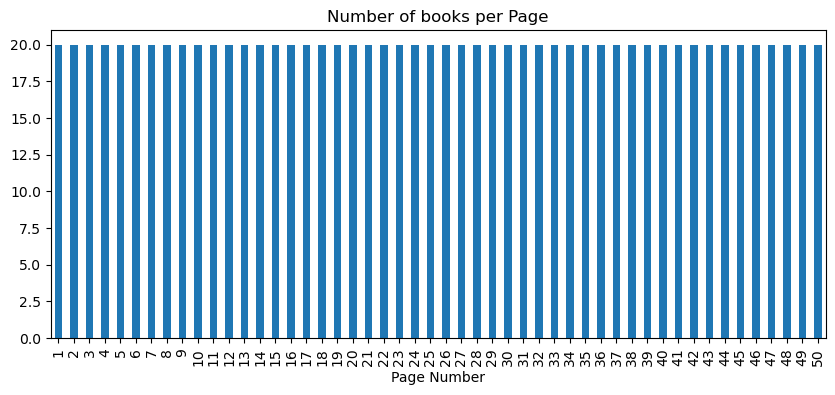

In [60]:
df['Page Number'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title("Number of books per Page")
plt.show()

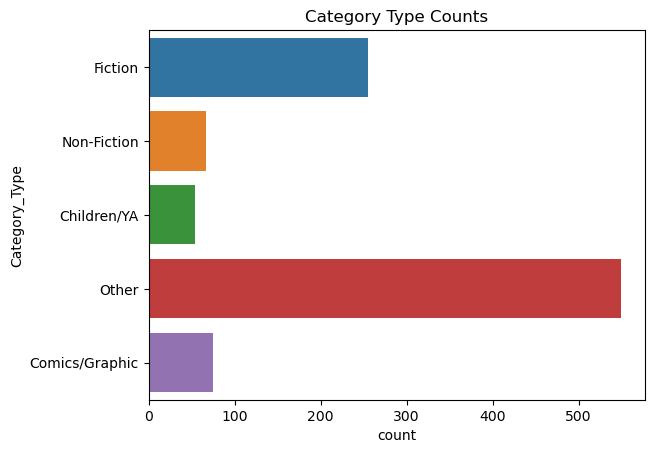

In [61]:
sns.countplot(y='Category_Type', data=df)
plt.title("Category Type Counts")
plt.show()

## Bivariate Analysis (Column vs Column)

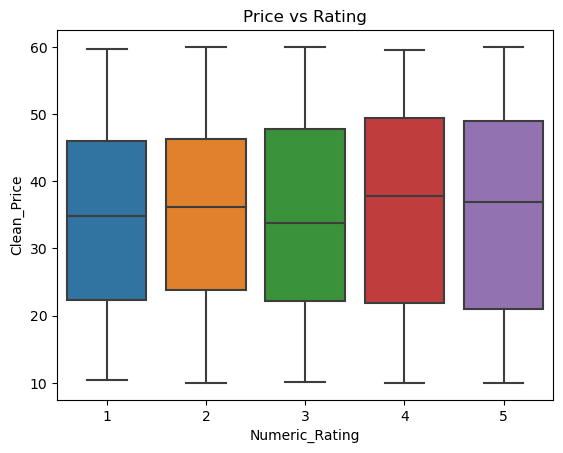

In [62]:
sns.boxplot(x='Numeric_Rating', y='Clean_Price', data=df)
plt.title("Price vs Rating")
plt.show()

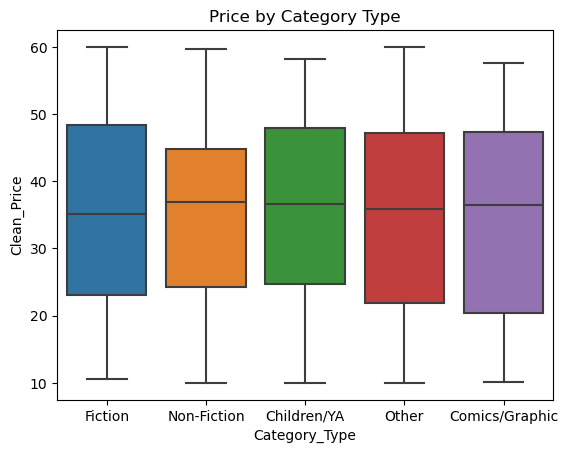

In [63]:
sns.boxplot(x='Category_Type', y='Clean_Price', data=df)
plt.title("Price by Category Type")
plt.show()

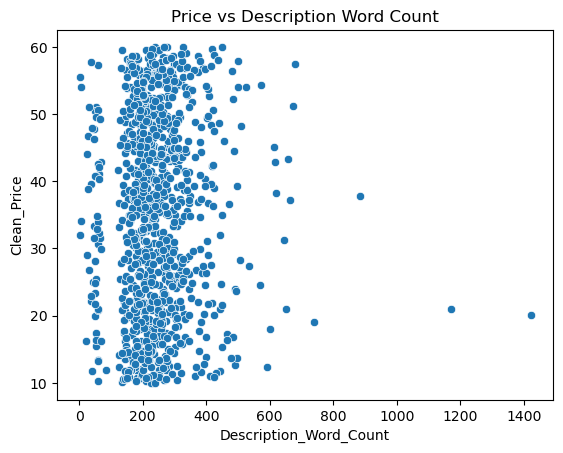

In [64]:
sns.scatterplot(x='Description_Word_Count', y='Clean_Price', data=df)
plt.title("Price vs Description Word Count")
plt.show()

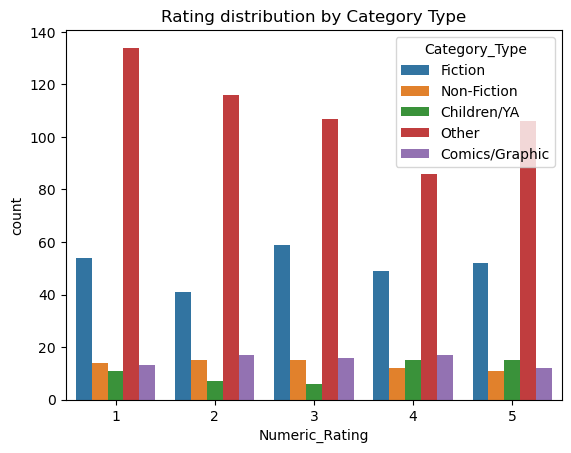

In [65]:
sns.countplot(x='Numeric_Rating', hue='Category_Type', data=df)
plt.title("Rating distribution by Category Type")
plt.show()

## Multivariate Analysis (3+ variables)

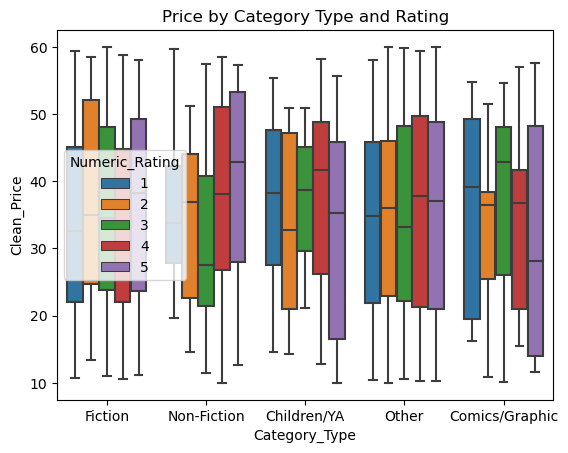

In [66]:
sns.boxplot(x='Category_Type', y='Clean_Price', hue='Numeric_Rating', data=df)
plt.title("Price by Category Type and Rating")
plt.show()

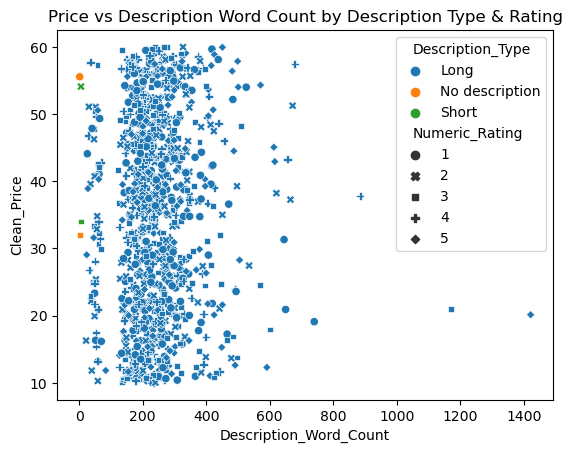

In [67]:
sns.scatterplot(
    x='Description_Word_Count',
    y='Clean_Price',
    hue='Description_Type',
    style='Numeric_Rating',
    data=df
)
plt.title("Price vs Description Word Count by Description Type & Rating")
plt.show()

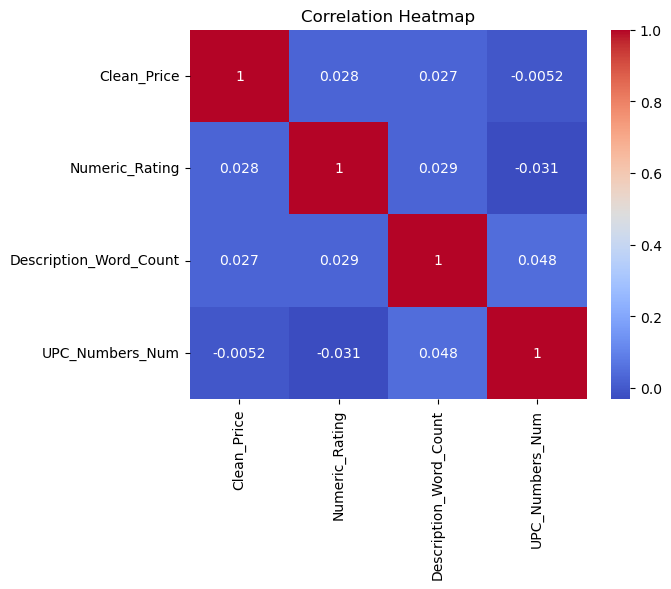

In [68]:
numeric_cols = ["Clean_Price", "Numeric_Rating", "Description_Word_Count", "UPC_Numbers_Num"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()